<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('/Users/umaprasad/dat-02-22/Homework/Unit2/data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
num_rows = len(movies)
num_cols = len(movies.columns)
#979 rows
#6 columns
print('There are', num_rows, 'rows and', num_cols, 'columns')

There are 979 rows and 6 columns


#### Check the data type of each column.

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
avg_duration = movies['duration'].mean()
#average duration is 120.98 minutes

#avg_duration

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
movies.sort_values(by='duration')
#Shortest movie is Freaks, 64 minutes long
#Longest movie is Hamlet, 242 minutes long

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

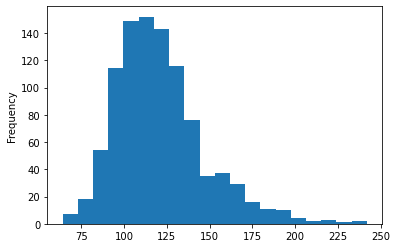

In [7]:
movies.duration.plot(kind='hist', bins=20);

#### Use a box plot to display that same data.

<AxesSubplot:>

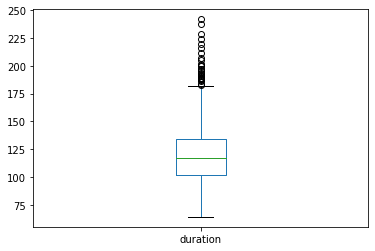

In [8]:
movies.duration.plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

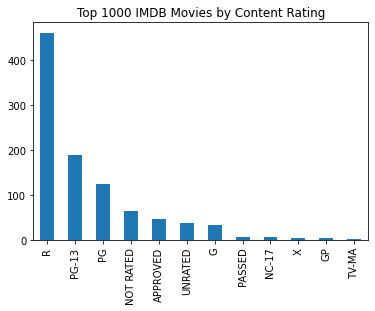

In [10]:
movies.content_rating.value_counts().plot(kind='bar', x = 'Content Rating', y = 'Number of Movies', title='Top 1000 IMDB Movies by Content Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
movies.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace=True)

#### Count the number of missing values in each column.

In [13]:
movies.isnull().sum()
#3 missing values in content rating
#no missing values in other columns

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [14]:
movies[movies.content_rating.isnull()]
movies.content_rating.fillna('NOT RATED', inplace=True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [15]:
#mean for movies 2 hours or longer: 7.948898678414082
movies[movies.duration >= 120].star_rating.mean()

#mean for movies less than 2 hours: 7.838666666666657
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

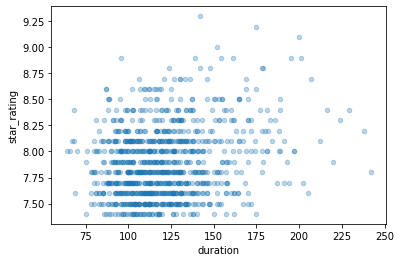

In [16]:
movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.3);

#### Calculate the average duration for each genre.

In [17]:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

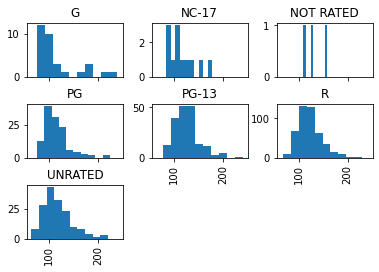

In [18]:
#movies.hist(column='duration', by='content_rating')
movies.hist(column='duration', by='content_rating', sharex=True);

#### Determine the top rated movie (by star rating) for each genre.

In [19]:
#movies.sort_values('star_rating', ascending=False).groupby('genre').title.first()

top = movies.groupby('genre')['star_rating'].idxmax().values

movies.iloc[top][['title', 'star_rating', 'genre']]

,title,star_rating,genre
3,The Dark Knight,9.0,Action
7,The Lord of the Rings: The Return of the King,8.9,Adventure
30,Spirited Away,8.6,Animation
8,Schindler's List,8.9,Biography
25,Life Is Beautiful,8.6,Comedy
0,The Shawshank Redemption,9.3,Crime
5,12 Angry Men,8.9,Drama
468,E.T. the Extra-Terrestrial,7.9,Family
638,The City of Lost Children,7.7,Fantasy
105,The Third Man,8.3,Film-Noir


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [20]:
dupe_titles = movies[movies.title.duplicated()].title
movies[movies.title.isin(dupe_titles)]

#there are multiple movies with same Title, but they are not duplicates as they have diff durations, genres, etc.

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NOT RATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [21]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [22]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [23]:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 9]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Western      8.255556
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [24]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!